In [2]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate

import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [3]:
from matplotlib import rc
rc("animation", html = "jshtml")

In [4]:
#parametros
g = 9.8 #m/s^2
m = 0.5 #kg
h = 0.25 #m
R = 0.225 #m

tiempo = 2 #s
puntos = int(tiempo*200)
theta_0 = 0



In [5]:
#ecuaciones
def ecuacion_mov(t,w,g,m,h,R):
    theta, omega = w
    F=omega
    f=(5*g/7*R)*np.cos(theta)
    return [F,f]
    

In [6]:
def solucion_ecuaciones(cond_ini, g, m, h, R , time, puntos):
    t = np.linspace(0, time, puntos)
    args = (g, m, h, R)
    sol = integrate.solve_ivp(ecuacion_mov,[0,time],cond_ini,'DOP853',t,args=args)
    return sol

In [7]:
def polares_a_catesianas(soluciones, R):
    x1 = R * np.cos(soluciones[0,:])
    y1 = - R * np.sin(soluciones[0,:])
    return np.array([x1, y1])
cond_ini = np.array([0,0])
sol = solucion_ecuaciones(cond_ini,g,m,h,R,tiempo,puntos)
data = polares_a_catesianas(sol.y, R)
print(sol.y[1:]*(180/np.pi))

[[  0.           0.4523351    0.9046702    1.3570053    1.80934039
    2.26167545   2.71401047   3.16634541   3.61868023   4.07101487
    4.52334924   4.97568326   5.42801681   5.88034974   6.3326819
    6.78501307   7.23734305   7.68967158   8.14199836   8.59432308
    9.04664536   9.49896481   9.95128097  10.4035933   10.85590119
   11.3082041   11.76050141  12.21279246  12.66507652  13.11735282
   13.56962051  14.02187866  14.4741263   14.92636239  15.37858579
   15.83079532  16.28298971  16.73516762  17.18732763  17.63946825
   18.09158789  18.54368488  18.99575748  19.44780386  19.89982208
   20.35181013  20.80376591  21.25568719  21.7075717   22.15941701
   22.61122064  23.06297997  23.5146923   23.96635481  24.41796457
   24.86951854  25.32101358  25.77244641  26.22381366  26.67511183
   27.12633727  27.57748626  28.02855492  28.47953924  28.9304351
   29.38123823  29.83194424  30.2825486   30.73304664  31.18343355
   31.63370438  32.08385404  32.5338773   32.98376875  33.433522

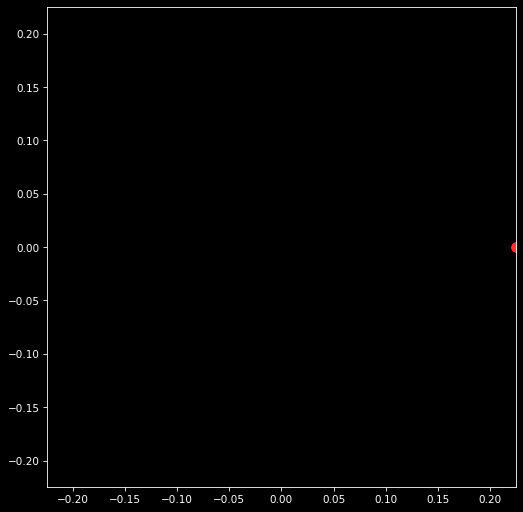

In [8]:
fps = 24
def update(num_frame,d,elements,paso):
    j = num_frame * paso
    masa, trayectoria = elements
    masa.set_offsets(d[:,j:j+2].T)
    trayectoria.set_data(d[:,j:j+2])
    return masa,trayectoria

def inicializar_elementos_graficos(d,m,ax):
    masa = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
    trayectoria, = ax.plot(d[0, :1], d[1, :1],c='#ff3030', zorder=-1)
    return masa, trayectoria
def ajustar_ejes_coordenados(R):
    fig = plt.figure(figsize = (7,7), dpi = 75)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
    ax = fig.gca()
    plt.tight_layout()
    plt.xlim([-R, R])
    plt.ylim([-R, R])
    return fig, ax
def crear_animacion(data, R, m, time, fps, name):
    N = time*fps
    paso = int(np.floor(data.shape[1] / N))
    if paso<1: raise ValueError('Escoje puntos > '+ str(N))
    fig, ax = ajustar_ejes_coordenados(R)
    elements = inicializar_elementos_graficos(data,m,ax)
    ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
    ani.save(name, fps=fps, writer='pillow')
    return ani
start_time = time.time()
crear_animacion(data,R,m,tiempo,fps,'Soluciòn particular.gif')